In [1]:
# importing different different libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('ToyotaCorolla.csv',encoding = 'ISO-8859-1')

Insights :

-  .read_csv is a function of pandas library.

-  we use .read_csv function to read the csv files.

-  Import csv file and convert it to a DataFrame object

In [3]:
df.head()  # use .head to see first 5 element of DataFrame

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


Insights :

-  .head() function is use to see first 5 elements of the data frame 

-  we can get just some idea about data by using .head() function like how many colums we have and how data is string or numeric etc.

In [4]:
df.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

Insights :

-  To see Column name we use .columns function

In [5]:
df.shape # using .shape for knowing the rows n colloumns

(1436, 38)

Insights :

.shape function use to see the shape of the data frame like how many rows and columns its contain

its also shows the data is one dimensional or two dimensional

In [6]:
df.info() # .info() shows the columns names how any rows are non-null and their data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

Insights :

-  .info() function is use to msee data type of the columns.

-  to see how many rows contains value means not null 

In [7]:
#saperating columns with datatype- object, beacause we cannot find corelation of object type features with target variables.
e=[]
for col in df.columns:
    if df[col].dtype == 'object':
        e.append(col)
e

['Model', 'Fuel_Type', 'Color']

In [8]:
df.Model.value_counts() #to see data is catogorcal or not

TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-Doors     107
TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-Doors      83
TOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-Doors        79
TOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-Doors       70
TOYOTA Corolla 1.6 16V SEDAN LINEA TERRA 4/5-Doors       43
                                                       ... 
TOYOTA Corolla 2.0D 4/5-Doors                             1
TOYOTA Corolla 1.6 16v TERRA 4/5-Doors                    1
TOYOTA Corolla 1.6 HB SOL 2/3-Doors                       1
 TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-Doors      1
TOYOTA Corolla 1.3 Linea Terra 4/5-Doors                  1
Name: Model, Length: 372, dtype: int64

In [9]:
df.Fuel_Type.value_counts()

Petrol    1264
Diesel     155
CNG         17
Name: Fuel_Type, dtype: int64

In [10]:
df.Color.value_counts()

Grey      301
Blue      283
Red       278
Green     220
Black     191
Silver    122
White      31
Violet      4
Yellow      3
Beige       3
Name: Color, dtype: int64

Insights :

-  .value_counts() use to see our colums contain catogorical data or not

-  It will give the counts of data that how many times the certain data comes or occurs.

-  Now in the Current scenario Model column contain non catogorical data However Fuel_Type and Color contains catogorical data.

-  To convert the data in numeric format we use encoding.(One Hot Coding)

In [11]:
df = pd.get_dummies(df,columns=['Fuel_Type','Color'])

Insights :

-  .get dummies() is use to convert the catogorical object data into numeric format (0 and 1).

-  it will create dummies of the data on the basis of catogorical data

-  to convert catogorical data using .get_dummies is called as One Hot coding.

In [12]:
df.info() # new colums are added due to get_dummies

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 49 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   HP                1436 non-null   int64 
 8   Met_Color         1436 non-null   int64 
 9   Automatic         1436 non-null   int64 
 10  cc                1436 non-null   int64 
 11  Doors             1436 non-null   int64 
 12  Cylinders         1436 non-null   int64 
 13  Gears             1436 non-null   int64 
 14  Quarterly_Tax     1436 non-null   int64 
 15  Weight            1436 non-null   int64 
 16  Mfr_Guarantee     1436 non-null   int64 
 17  BOVAG_Guarante

In [13]:
df.isnull().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
HP                  0
Met_Color           0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
Fuel_Type_CNG       0
Fuel_Type_Diesel    0
Fuel_Type_Petrol    0
Color_Beige         0
Color_Black         0
Color_Blue          0
Color_Green         0
Color_Grey          0
Color_Red           0
Color_Silv

Insights :

-  .isnull() function to see the null data present in the data frame

-  we use .sum() function after .isnull() for taking sum of the null values (how many rows contains null values)

In [14]:
df.describe() # .describe use to calculate the some statistical data 

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Color_Beige,Color_Black,Color_Blue,Color_Green,Color_Grey,Color_Red,Color_Silver,Color_Violet,Color_White,Color_Yellow
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.002089,0.133008,0.197075,0.153203,0.209610,0.193593,0.084958,0.002786,0.021588,0.002089
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.045675,0.339702,0.397928,0.360309,0.407172,0.395251,0.278917,0.052723,0.145384,0.045675
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Insights :

-  .describe() function is statistical funtion

-  To see some mathematical operation on data frame. it is perfom mathematical operation only on numerical data like the columns which contains numeric data. 

In [15]:
features=df.drop('Price',axis=1)
features.shape

(1436, 48)

In [16]:
df.shape

(1436, 49)

In [17]:
#by using .corr() we can see corelation between variables
#checking all features corelation with target variables
#if corelation is more then 0.3 and below -0.3 then we will use that feature further in model
corr_x=[]
for col in features.columns:
    if features[col].dtype!='object':
        if features[col].corr(df.Price)>0.3 or features[col].corr(df.Price)<-0.3:
            corr_x.append(col)

In [18]:
df.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'HP', 'Met_Color', 'Automatic', 'cc', 'Doors', 'Cylinders', 'Gears',
       'Quarterly_Tax', 'Weight', 'Mfr_Guarantee', 'BOVAG_Guarantee',
       'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco',
       'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
       'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps',
       'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette',
       'Tow_Bar', 'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Color_Beige', 'Color_Black', 'Color_Blue', 'Color_Green', 'Color_Grey',
       'Color_Red', 'Color_Silver', 'Color_Violet', 'Color_White',
       'Color_Yellow'],
      dtype='object')

In [19]:
corr_x

['Id',
 'Age_08_04',
 'Mfg_Year',
 'KM',
 'HP',
 'Weight',
 'ABS',
 'Airco',
 'Automatic_airco',
 'Boardcomputer',
 'CD_Player',
 'Central_Lock',
 'Powered_Windows']

Insight : 

-  In above case we are considering the Id, Age_08_04, Mfg_Year, KM,HP, Weight, ABS, Airco, Automatic_airco, Boardcomputer, CD_Player, Central_Lock, Powered_Windows features because this features are less corelated with target variable.
-  using features variables with corelation more then 0.3 and less then -0.3 with Target variable for preparing model

In [20]:
df = df[['Id',
 'Age_08_04',
 'Mfg_Year',
 'KM',
 'HP',
 'Weight',
 'ABS',
 'Airco',
 'Automatic_airco',
 'Boardcomputer',
 'CD_Player',
 'Central_Lock',
 'Powered_Windows','Price']]

In [21]:
df.head()

,Id,Age_08_04,Mfg_Year,KM,HP,Weight,ABS,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Price
0,1,23,2002,46986,90,1165,1,0,0,1,0,1,1,13500
1,2,23,2002,72937,90,1165,1,1,0,1,1,1,0,13750
2,3,24,2002,41711,90,1165,1,0,0,1,0,0,0,13950
3,4,26,2002,48000,90,1165,1,0,0,1,0,0,0,14950
4,5,30,2002,38500,90,1170,1,1,0,1,0,1,1,13750


In [22]:
df.drop(['Id'],axis=1,inplace=True)

In [23]:
#standardization 
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()
df_std=scaler.fit_transform(df)
df_std = pd.DataFrame(df_std, columns = df.columns)

Insight : 

-  All the cetegorical columns are converted in (0,1) so to reduce unit gap in data we will do standardization of data 

In [24]:
df_std.head()

,Age_08_04,Mfg_Year,KM,HP,Weight,ABS,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Price
0,-1.771966,1.541796,-0.574695,-0.768042,1.758561,0.479012,-1.016855,-0.244497,1.547514,-0.529015,0.850817,0.882853,0.763763
1,-1.771966,1.541796,0.117454,-0.768042,1.758561,0.479012,0.983424,-0.244497,1.547514,1.890304,0.850817,-1.132691,0.832715
2,-1.718184,1.541796,-0.715386,-0.768042,1.758561,0.479012,-1.016855,-0.244497,1.547514,-0.529015,-1.175341,-1.132691,0.887877
3,-1.610620,1.541796,-0.547650,-0.768042,1.758561,0.479012,-1.016855,-0.244497,1.547514,-0.529015,-1.175341,-1.132691,1.163685
4,-1.395491,1.541796,-0.801028,-0.768042,1.853577,0.479012,0.983424,-0.244497,1.547514,-0.529015,0.850817,0.882853,0.832715


In [25]:
df.corr()

,Age_08_04,Mfg_Year,KM,HP,Weight,ABS,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Price
Age_08_04,1.000000,-0.983661,0.505672,-0.156622,-0.470253,-0.412887,-0.403600,-0.426259,-0.719449,-0.510895,-0.279631,-0.283856,-0.876590
Mfg_Year,-0.983661,1.000000,-0.504974,0.164697,0.473478,0.402215,0.395674,0.437718,0.720567,0.517008,0.279490,0.280996,0.885159
KM,0.505672,-0.504974,1.000000,-0.333538,-0.028598,-0.177203,-0.133057,-0.258221,-0.353862,-0.266826,-0.125177,-0.156242,-0.569960
HP,-0.156622,0.164697,-0.333538,1.000000,0.089614,0.057832,0.241134,0.244957,0.129715,0.102300,0.250122,0.265593,0.314990
Weight,-0.470253,0.473478,-0.028598,0.089614,1.000000,0.102616,0.310062,0.430479,0.274324,0.247056,0.234644,0.213356,0.581198
ABS,-0.412887,0.402215,-0.177203,0.057832,0.102616,1.000000,0.226095,0.117117,0.309536,0.192866,0.099454,0.099465,0.306138
Airco,-0.403600,0.395674,-0.133057,0.241134,0.310062,0.226095,1.000000,0.240444,0.293244,0.257387,0.540588,0.543982,0.429259
Automatic_airco,-0.426259,0.437718,-0.258221,0.244957,0.430479,0.117117,0.240444,1.000000,0.272415,0.250396,0.195790,0.203687,0.588262
Boardcomputer,-0.719449,0.720567,-0.353862,0.129715,0.274324,0.309536,0.293244,0.272415,1.000000,0.489725,0.203126,0.213327,0.601292
CD_Player,-0.510895,0.517008,-0.266826,0.102300,0.247056,0.192866,0.257387,0.250396,0.489725,1.000000,0.194076,0.195386,0.481374


<AxesSubplot:>

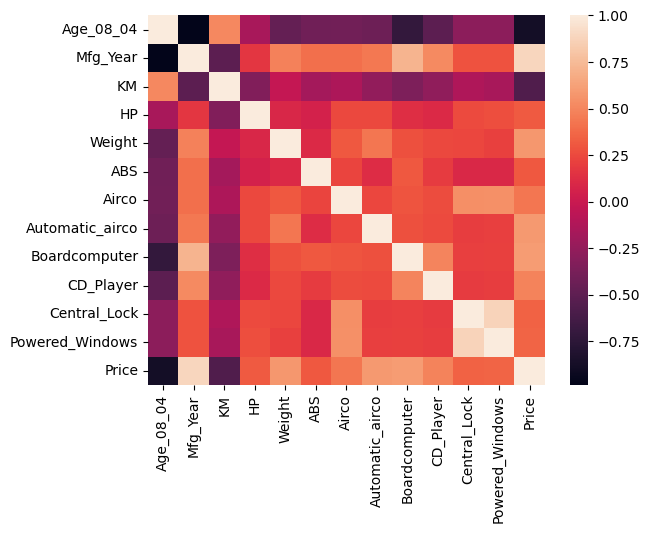

In [26]:
sns.heatmap(df.corr())

<AxesSubplot:>

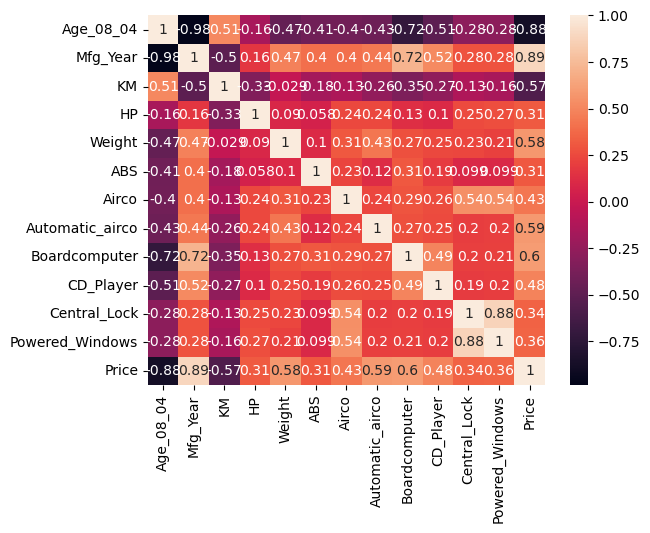

In [27]:
sns.heatmap(df.corr(),annot=True)

Insights :

-  .corr() means corelaton how data is corelated to each other

-  we have to see how our data is corelated and remove the highly corelated data.

-  With the help sns.heat(corr) we visualize the corelation between the features

In [28]:
df = df.drop(['Age_08_04'],axis=1)

<AxesSubplot:>

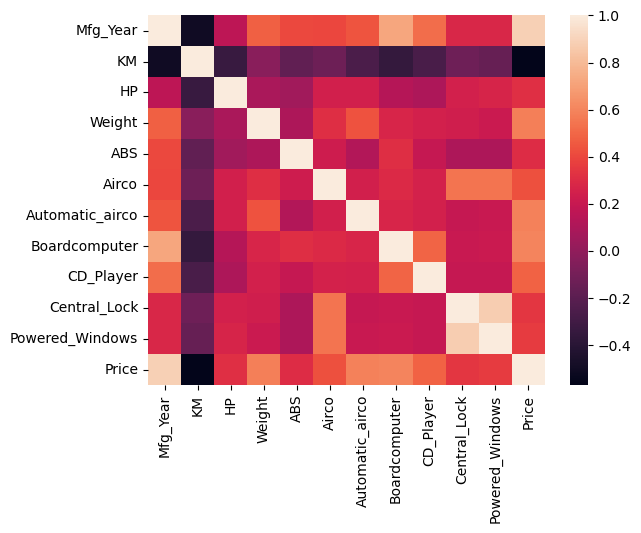

In [29]:
sns.heatmap(df.corr())

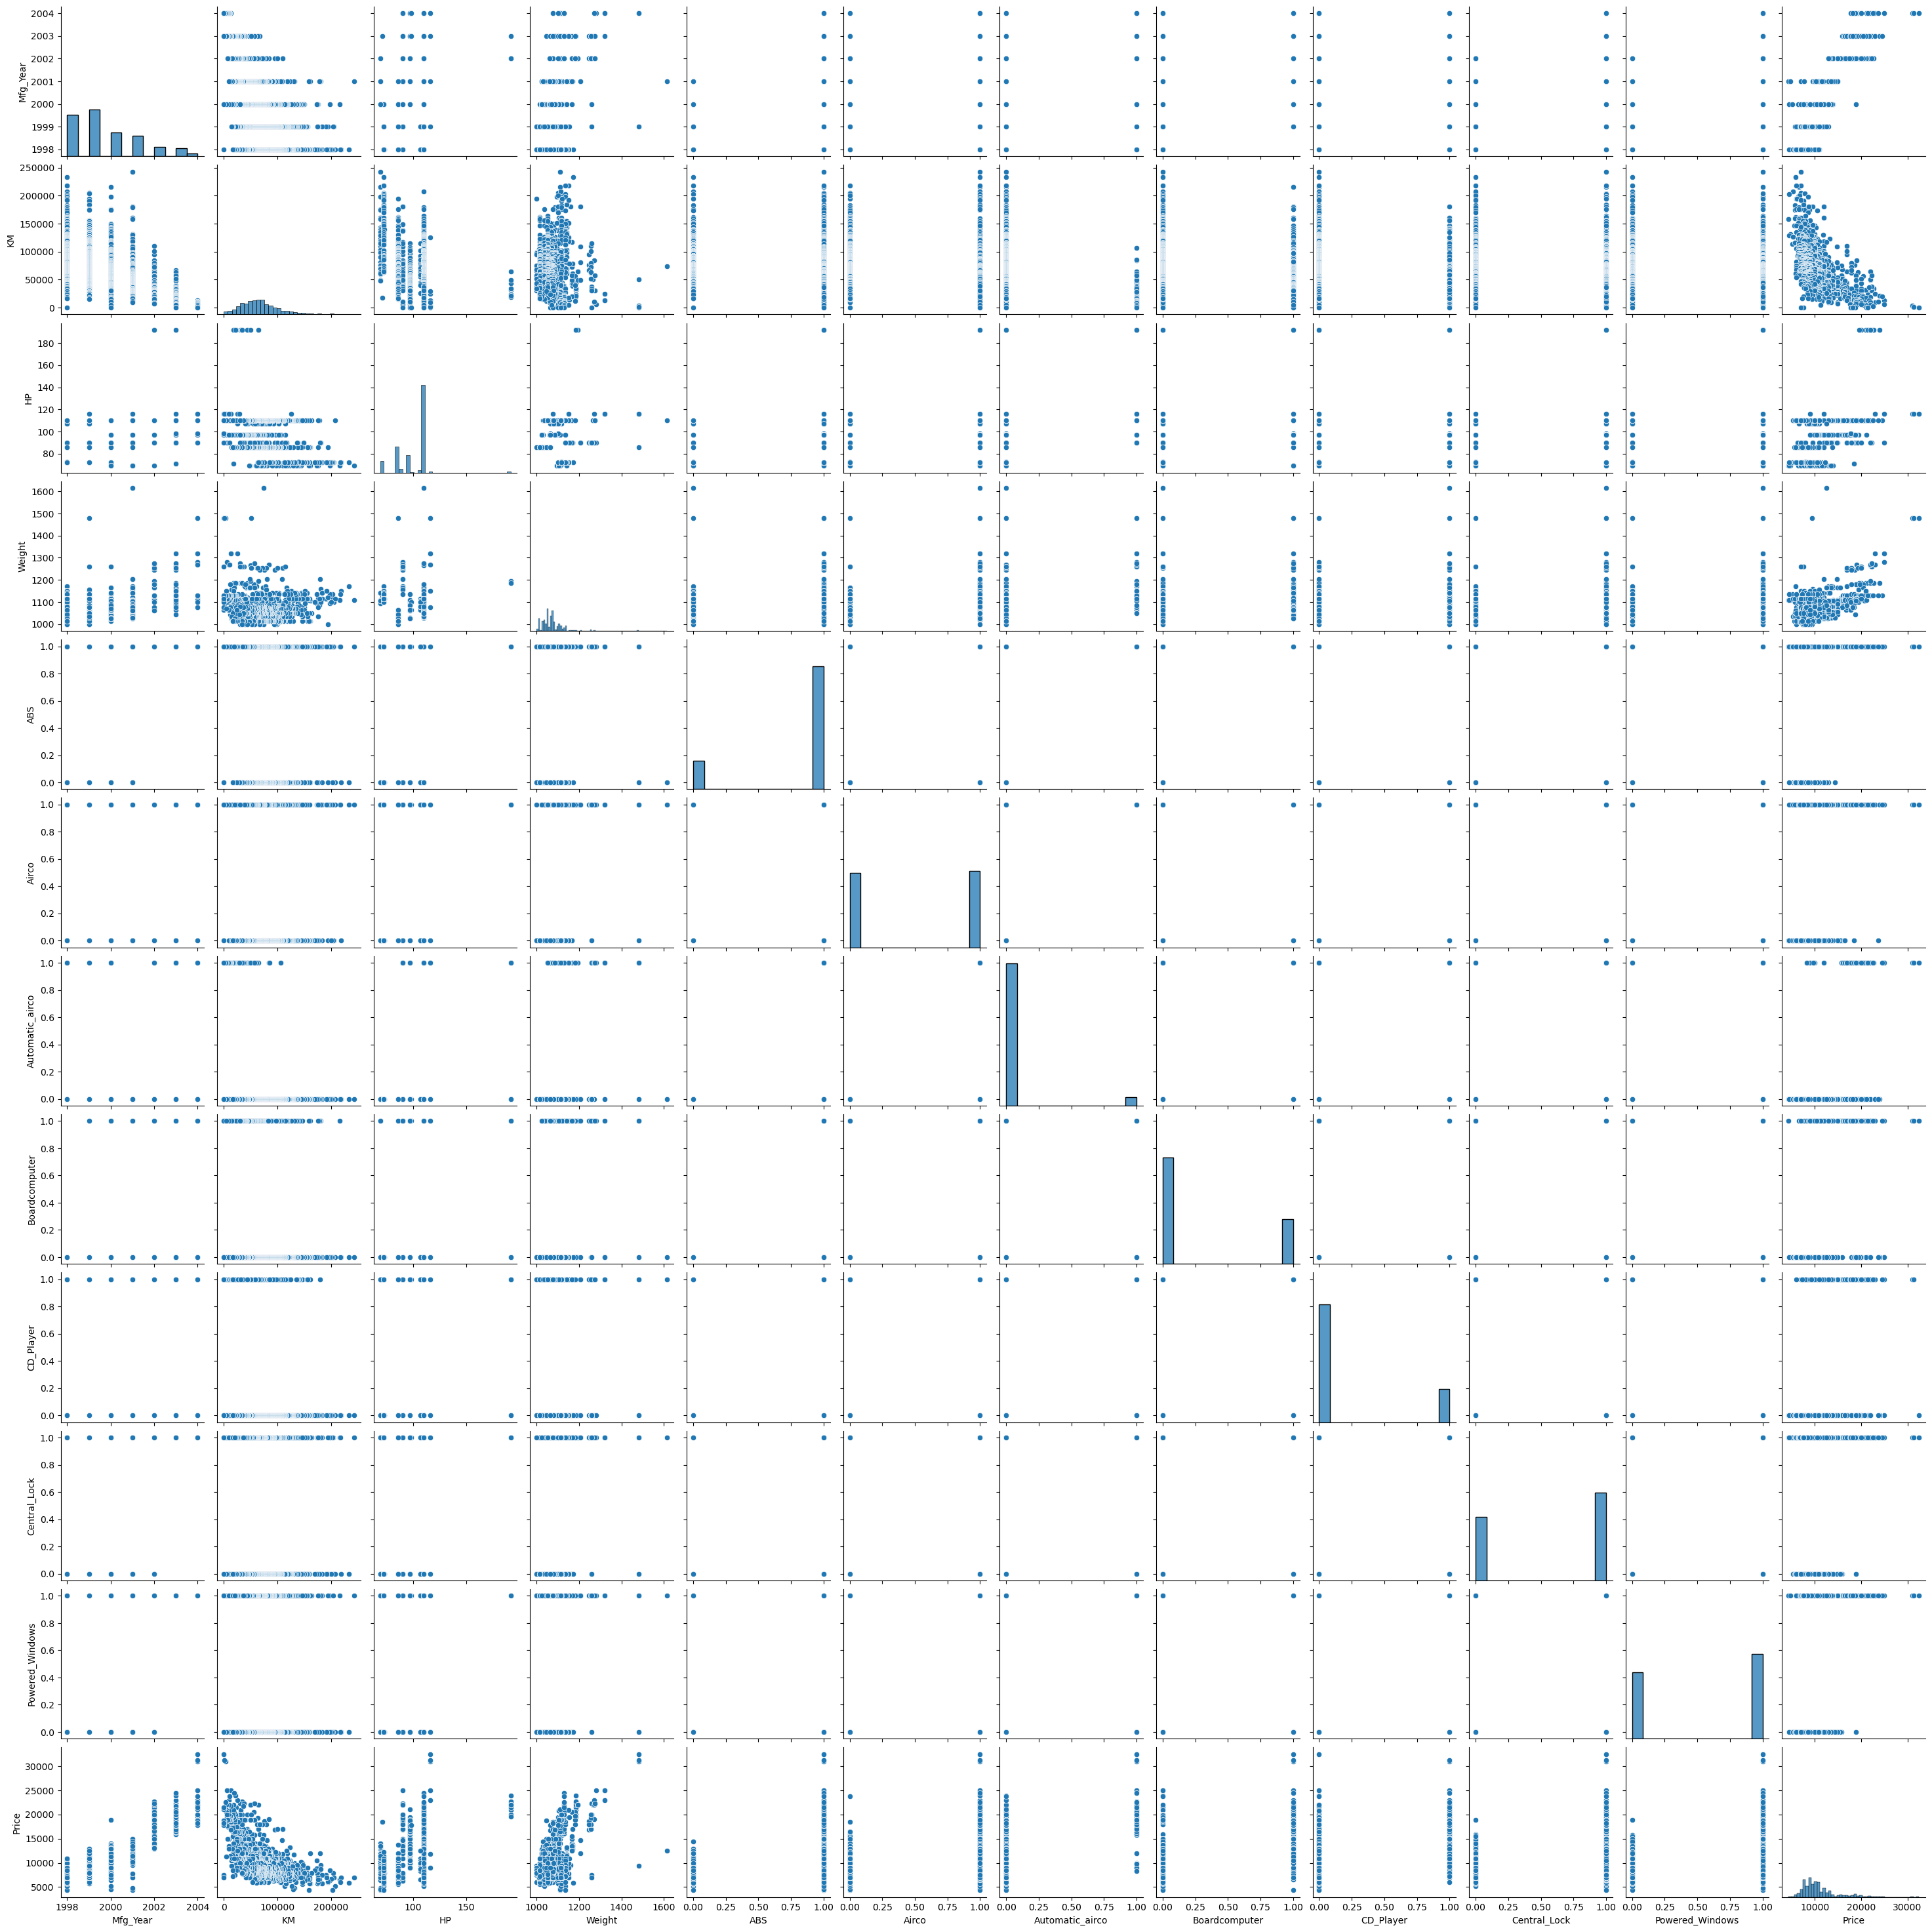

In [30]:
#Format the plot background and scatter plots for all the variables
#cheking is corelation between features by pairplot
sns.pairplot(df)

In [31]:
df

,Mfg_Year,KM,HP,Weight,ABS,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Price
0,2002,46986,90,1165,1,0,0,1,0,1,1,13500
1,2002,72937,90,1165,1,1,0,1,1,1,0,13750
2,2002,41711,90,1165,1,0,0,1,0,0,0,13950
3,2002,48000,90,1165,1,0,0,1,0,0,0,14950
4,2002,38500,90,1170,1,1,0,1,0,1,1,13750
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1998,20544,86,1025,1,1,0,0,0,1,1,7500
1432,1998,19000,86,1015,1,0,0,0,0,0,0,10845
1433,1998,17016,86,1015,0,0,0,0,0,0,0,8500
1434,1998,16916,86,1015,0,0,0,0,0,0,0,7250


{'whiskers': [<matplotlib.lines.Line2D at 0x24aa61f4eb0>,
 'caps': [<matplotlib.lines.Line2D at 0x24aa61ca4c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24aa61f49d0>],
 'medians': [<matplotlib.lines.Line2D at 0x24aa61caa60>],
 'fliers': [<matplotlib.lines.Line2D at 0x24aa61cad30>],
 'means': []}

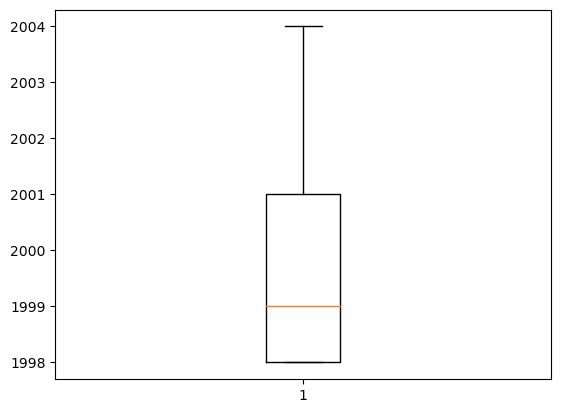

In [32]:
plt.boxplot(df['Mfg_Year']) # for detecting outlier use boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x24aa6227df0>,
 'caps': [<matplotlib.lines.Line2D at 0x24aa624f400>,
 'boxes': [<matplotlib.lines.Line2D at 0x24aa6227c40>],
 'medians': [<matplotlib.lines.Line2D at 0x24aa624f9a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24aa624fc70>],
 'means': []}

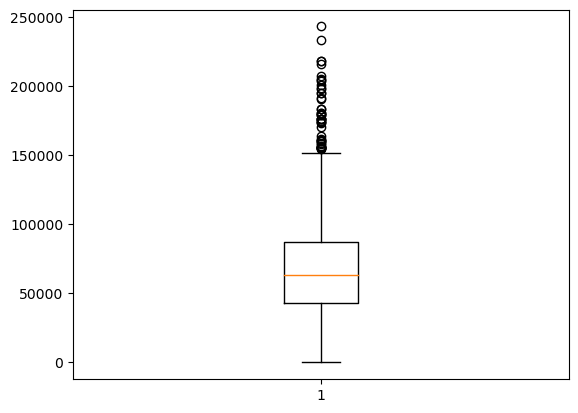

In [33]:
plt.boxplot(df['KM']) # for detecting outlier use boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x24aa83c49d0>,
 'caps': [<matplotlib.lines.Line2D at 0x24aa83c4f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x24aa83c4820>],
 'medians': [<matplotlib.lines.Line2D at 0x24aa83d3550>],
 'fliers': [<matplotlib.lines.Line2D at 0x24aa83d3820>],
 'means': []}

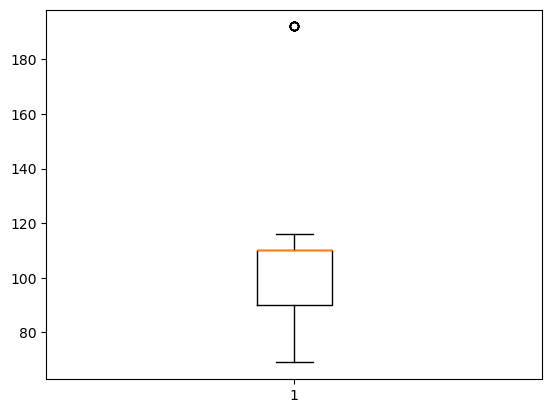

In [34]:
plt.boxplot(df['HP']) # for detecting outlier use boxplot

In [35]:
df[df.HP>180]

,Mfg_Year,KM,HP,Weight,ABS,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Price
8,2002,19700,192,1185,1,1,0,0,0,1,1,21500
10,2002,31461,192,1185,1,1,1,0,1,1,1,20950
11,2002,43610,192,1185,1,1,1,1,0,1,1,19950
12,2002,32189,192,1185,1,1,1,1,0,1,1,19600
13,2002,23000,192,1185,1,1,1,1,1,1,1,21500
14,2002,34131,192,1185,1,1,1,1,1,1,1,22500
15,2002,18739,192,1185,1,1,1,1,0,1,1,22000
16,2002,34000,192,1185,1,1,1,1,1,1,1,22750
49,2002,64982,192,1195,1,1,1,1,0,1,1,21950
53,2002,49866,192,1195,1,1,0,0,0,1,1,21950


In [36]:
df = df.drop([8,10,11,12,13,14,15,16,49,53,141])

Insight :

-  In above case we get an outliers in HP feature and this outlier are minumum so we are droping them.

{'whiskers': [<matplotlib.lines.Line2D at 0x24aa83e7d00>,
 'caps': [<matplotlib.lines.Line2D at 0x24aa83f62e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24aa83e7a30>],
 'medians': [<matplotlib.lines.Line2D at 0x24aa83f6880>],
 'fliers': [<matplotlib.lines.Line2D at 0x24aa83f6b50>],
 'means': []}

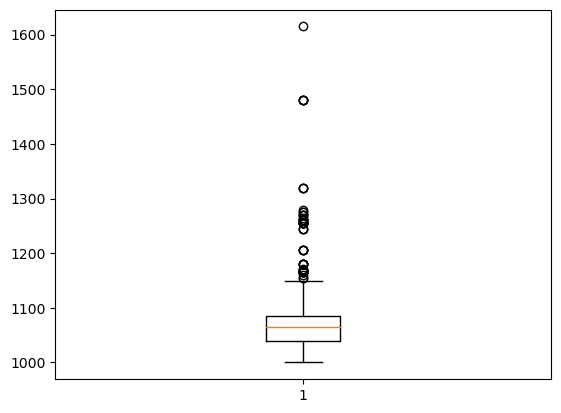

In [37]:
plt.boxplot(df['Weight']) # for detecting outlier use boxplot

Insight :

-  Where as outliers in the KM and in Weights columns are more so while droping them will cause a data loss so we are ignoreing them and try to focus on other thing to improvethe score.

In [38]:
df.shape

(1425, 12)

In [39]:
import scipy.stats as stat
import pylab

Insight :

-  Here we are using stats library of scipy for calculation purpose and pylab for plots.

In [40]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

Insight :

-  Creating a function for ploting a data frame againts feature to see the linearity.
-  We use probplot here to to calculate best fit line and plot according to that.

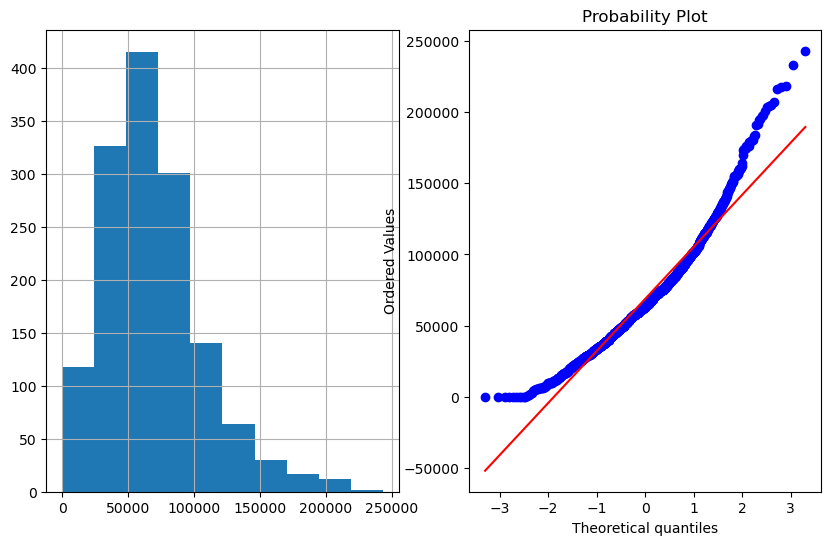

In [41]:
plot_data(df,'KM')

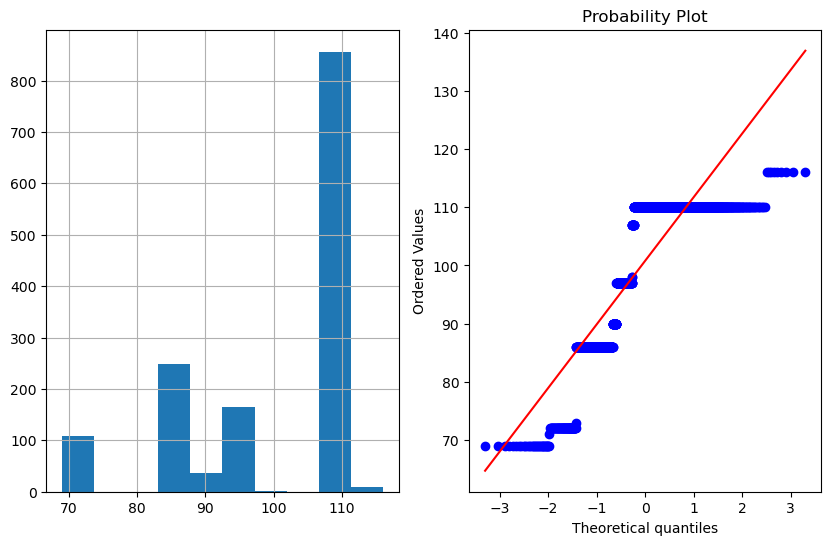

In [42]:
plot_data(df,'HP')

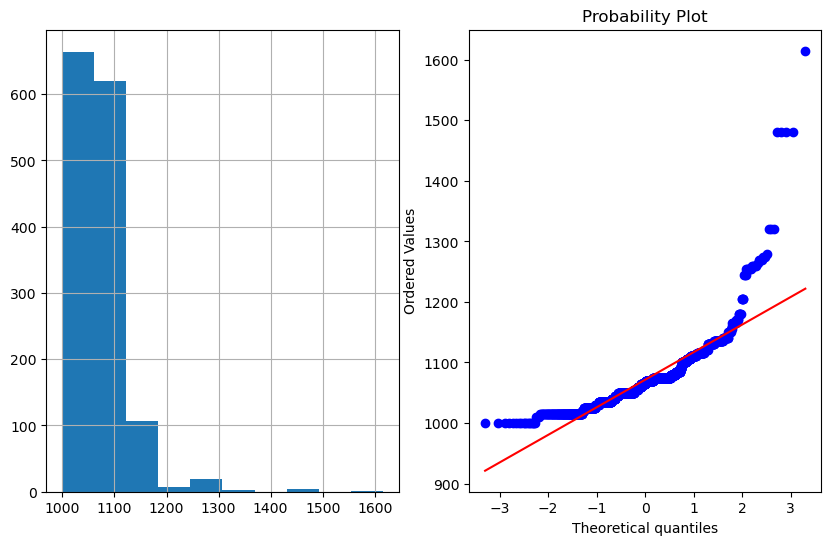

In [43]:
plot_data(df,'Weight')

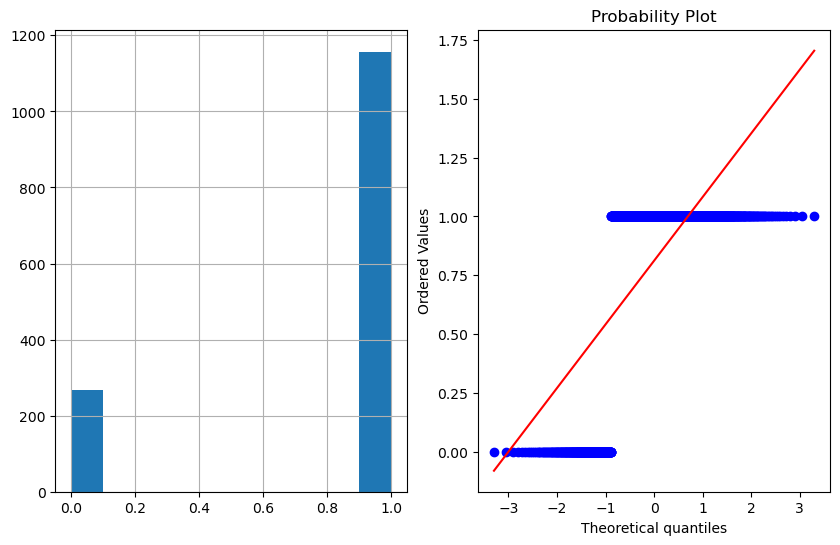

In [44]:
plot_data(df,'ABS')

Insight :

-  Ploting all the features against data frame to see the best fit line.

# Assigning indedpendent & dependent Variables

In [45]:
x = df_std.drop(['Price'],axis=1) #assigning input (x) 

Insight :

-  X is an independent variable and we are assigning value to it.
-  we drop Price column because it our output variable 

In [46]:
y = df_std.Price

Insight:

-  Y is a dependent variable and we are assigning value to it.

In [47]:
# Spliting data into train and test data 
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=3,test_size=0.30)

Insight :

-  With the help of train_test split we divided our dataframe into two parts (train and test)
-  we divided our data into train and test data into 70-30 size means our train data size is 70% of the whole data and test data size is 30% of the whole data
-  we divided our data in two data set because we perform all EDA, visualization, taking some insights from train data, and taken sll insights will apply on test data to predict and to check how good our model is work

In [48]:
# Model Building
model = LinearRegression()

Insight :

-  Creating model for the prediction
-  here we are using Linear Regression model because our output value is contineous value.

In [49]:
model.fit(x_train,y_train)

LinearRegression()

Insight :

-  .fit is use to fit data in model 
-  Here we are provide training data to model for fiting purpose

In [50]:
model.score(x_train,y_train)

0.8926531342862507

In [51]:
model.score(x_test,y_test)

0.8959240220698989

Insight :

-  .score use to check the score of the model, how much our model is able to give right answer
-  Here our model give score of 95.72% which is good but still we will try to improve it.

In [52]:
y_pred=model.predict(x_test)
residual = y_test - y_pred

In [53]:
model.intercept_

0.005505400966219411

In [54]:
model.coef_

array([-0.13935172,  0.49094445, -0.18600732,  0.08709499,  0.21999237,
       -0.03170416,  0.01780094,  0.15748428, -0.04971073,  0.01183165,
       -0.02268075,  0.07147179])

# Checking Assumptions of Linear Regression

-  Linear Relationship

In [55]:
x.head(1)

,Age_08_04,Mfg_Year,KM,HP,Weight,ABS,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows
0,-1.771966,1.541796,-0.574695,-0.768042,1.758561,0.479012,-1.016855,-0.244497,1.547514,-0.529015,0.850817,0.882853


In [56]:
y.head(1)

0    0.763763
Name: Price, dtype: float64

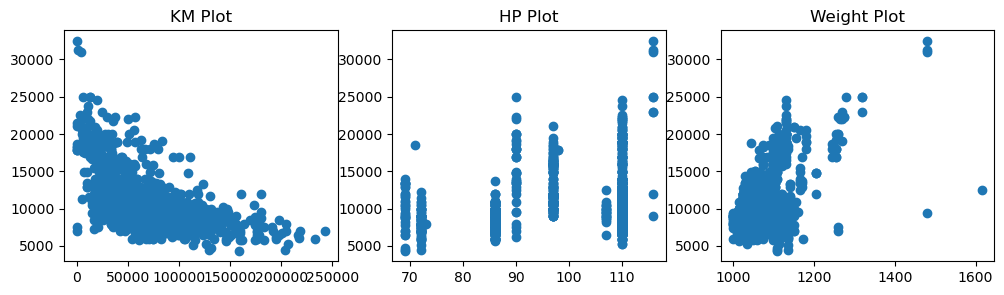

In [57]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3,figsize = (12,3))

ax1.scatter(df['KM'],df['Price'])
ax1.set_title('KM Plot')

ax2.scatter(df['HP'],df['Price'])
ax2.set_title('HP Plot')

ax3.scatter(df['Weight'],df['Price'])
ax3.set_title('Weight Plot')

plt.show()

Insights :

-  With the help of above scatter plot we can clearly see that there is linear relationship is present between features and target variables

-  Our first assumption of Linear regression is statisfied

-  Multicollinearity

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
VIF = []

for i in range(x_train.shape[1]):
    VIF.append(variance_inflation_factor(x_train, i))

In [60]:
pd.DataFrame({'VIF': VIF}, index=df.columns[0:12])

,VIF
Mfg_Year,31.680805
KM,31.575130
HP,1.625961
Weight,1.265165
ABS,1.593290
Airco,1.258372
Automatic_airco,1.655636
Boardcomputer,1.477673
CD_Player,2.149047
Central_Lock,1.351775


-  Multicollinearity states that there should not be any corelation between the independent variable.
-  We can check multicollinearity with the help of VIF score
-  Our VIF score is less than 6 except catogrical columns means their is no multicollinerity.
-  Our 2nd Assumption of Linear Regression is satisfied.

-  Normality of Residual 

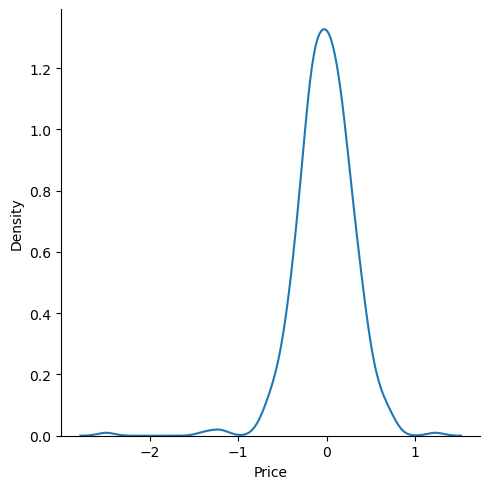

In [61]:
sns.displot(residual,kind='kde')

-  We can clearly see that our data is normally distributed with one small peak hike.
-  Our 3rd Assumption of Linear Regression is satisfied.

Homoscedasticity

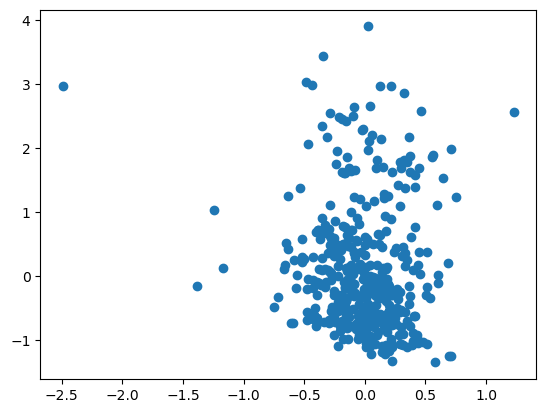

In [62]:
plt.scatter(residual, y_pred)

-  There is no such pattern seen in the plot. on that basis we can say that our 4th Assumption of Linear Regression is satisfied.

Autocorrelation of Residuals

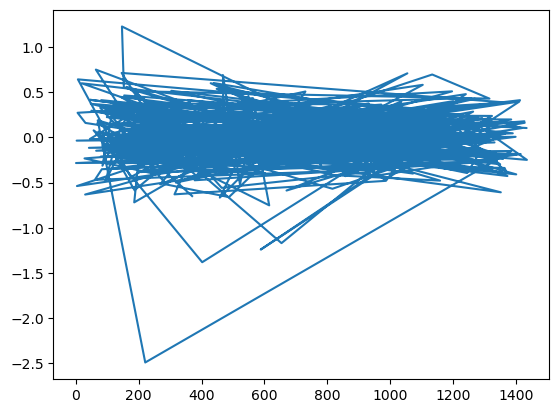

In [63]:
plt.plot(residual)

-  There is no such pattern/relation seen in the plot. on that basis we can say that our 5th Assumption of Linear Regression is satisfied.

Tranformation

-  Min Max Scaler

In [64]:
#Spliting data into train and test data 
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=3,test_size=0.30)

In [65]:
#Min max scaler 
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
x_train_minmax = pd.DataFrame(min_max.fit_transform(x_train))
x_train_minmax.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.873418,0.000000,0.264056,0.333333,0.072917,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.101266,0.833333,0.000000,0.235772,0.135417,1.0,1.0,0.0,1.0,1.0,1.0,1.0
2,0.278481,0.666667,0.121173,0.227642,0.229167,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.000000,0.000000,0.369659,0.333333,0.114583,1.0,1.0,0.0,0.0,0.0,1.0,1.0
4,0.734177,0.166667,0.158638,0.333333,0.104167,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [66]:
x_train_minmax.shape

(1005, 12)

In [67]:
x_test_minmax = pd.DataFrame(min_max.transform(x_test))

In [68]:
x_test_minmax.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.835443,0.166667,0.300504,0.308943,0.135417,1.0,1.0,0.0,0.0,0.0,1.0,1.0
1,0.886076,0.000000,0.352019,0.333333,0.156250,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,0.468354,0.500000,0.140724,0.333333,0.156250,1.0,1.0,0.0,1.0,1.0,0.0,0.0
3,0.645570,0.333333,0.133078,0.227642,0.052083,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.240506,0.833333,0.074264,0.227642,0.229167,1.0,1.0,0.0,1.0,1.0,1.0,1.0


In [69]:
x_test_minmax.shape

(431, 12)

In [70]:
model1 = LinearRegression()

In [71]:
model1.fit(x_train_minmax,y_train)

LinearRegression()

In [72]:
model1.score(x_train_minmax,y_train)

0.8926531342862507

In [73]:
model1.score(x_test_minmax,y_test)

0.8959240220698989

-  Robust Scaler

In [74]:
#Spliting data into train and test data 
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=3,test_size=0.30)

In [75]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
x_train_robust_scaler = pd.DataFrame(scaler.fit_transform(x_train))
x_train_robust_scaler.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.375000,-0.5,-0.057045,0.00,-0.777778,0.0,-1.0,0.0,0.0,0.000000,-1.0,-1.0
1,-2.166667,2.0,-1.466186,-0.60,-0.111111,0.0,0.0,0.0,1.0,2.419319,0.0,0.0
2,-1.583333,1.5,-0.819542,-0.65,0.888889,0.0,-1.0,0.0,1.0,2.419319,-1.0,-1.0
3,0.791667,-0.5,0.506506,0.00,-0.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,-0.083333,0.0,-0.619611,0.00,-0.444444,0.0,-1.0,0.0,0.0,0.000000,0.0,0.0


In [76]:
x_test_robust_scaler = pd.DataFrame(scaler.transform(x_test))
x_test_robust_scaler.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.250000,0.0,0.137457,-0.15,-0.111111,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.416667,-0.5,0.412371,0.00,0.111111,-2.566644,0.0,0.0,0.0,0.000000,0.0,0.0
2,-0.958333,1.0,-0.715212,0.00,0.111111,0.000000,0.0,0.0,1.0,2.419319,-1.0,-1.0
3,-0.375000,0.5,-0.756014,-0.65,-1.000000,0.000000,-1.0,0.0,1.0,0.000000,-1.0,-1.0
4,-1.708333,2.0,-1.069874,-0.65,0.888889,0.000000,0.0,0.0,1.0,2.419319,0.0,0.0


In [77]:
model2 = LinearRegression()

In [78]:
model2.fit(x_train_robust_scaler,y_train)

LinearRegression()

In [79]:
model2.score(x_train_robust_scaler,y_train)

0.8926531342862507

In [80]:
model2.score(x_test_robust_scaler,y_test)

0.8959240220698987

-  Square Transformation

In [81]:
#square transformation
x_train_s=x_train**2
x_test_s=x_test**2

In [82]:
#apply this transforemed date in model
model3 = LinearRegression()
model3.fit(x_train_s,y_train)

LinearRegression()

In [83]:
#score of model on train data
model3.score(x_train_s,y_train)

0.7867350477069878

In [84]:
#score of model on train data
model3.score(x_test_s,y_test)

0.7662142017007523

In [85]:
#Creating Dataframe of all model scores
data = pd.DataFrame({'Model No.':['Model','Model1','Model2','Model3'],
                     'Train_Score':[model.score(x_train,y_train),model1.score(x_train_minmax,y_train),model2.score(x_train_robust_scaler,y_train),model3.score(x_train_s,y_train)],
                     'Test_Score':[model.score(x_test,y_test),model1.score(x_test_minmax,y_test),model2.score(x_test_robust_scaler,y_test),model3.score(x_test_s,y_test)]})

In [86]:
data  # R^2 value for each prepared model

,Model No.,Train_Score,Test_Score
0,Model,0.892653,0.895924
1,Model1,0.892653,0.895924
2,Model2,0.892653,0.895924
3,Model3,0.786735,0.766214


Insight :

-  Here our first 3 models gives us a better score.